In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import scikitplot as skplt
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
def _get_path(radius, level, i):
    return r'A:\MSc\Pulmonary Nodules\sameslicethickness\arranged/radius_' + str(radius) + '/level_' + str(level) + '/v' + str(i) + '.npy'

In [3]:
class Normalizer:
    def __init__(self, data):
        self.min = np.min(data)
        self.max = np.max(data)
    
    def normalize(self, newdata):
        return (newdata - self.min)/(self.max - self.min)

# Compare different distances
In this trial, we are going to train a new model between level 1 vs level 5, using the three different radii.

## Training Data loading

In [4]:
def get_binary_training_data(radius, n = 1000, size = (64,64,28), levels=[1, 5]):
    h,w,d = size
    
    data = []
    label = []
    
    for level in levels:
        for i in tqdm(range(n)):
            try:
                data.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
            except :
                continue
            if level < 3:
                label.append(0)
            else :
                label.append(1)
    return data, label

def data_prep(data, labels, BATCH_SIZE = 32, SHUFFLE_BUFFER_SIZE = 100):
    train_ds, valid_ds, y_train, y_valid = train_test_split(data, labels, test_size=0.2, random_state=42)
    print("number of training examples: ", len(train_ds))
    print("number of validation examples: ", len(valid_ds))
    scaler = Normalizer(train_ds)
    train_ds = scaler.normalize(train_ds)
    valid_ds = scaler.normalize(valid_ds)
    print("max of training dataset: ", np.max(train_ds), " & min: ", np.min(train_ds))
    print("max of validation dataset: ", np.max(valid_ds), " & min: ", np.min(valid_ds))
    train_dataset = tf.data.Dataset.from_tensor_slices((train_ds, y_train))
    validation_dataset = tf.data.Dataset.from_tensor_slices((valid_ds, y_valid))

    train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
    validation_dataset = validation_dataset.batch(BATCH_SIZE)
    return train_dataset, validation_dataset

### Loading data

In [5]:
# data_10, label_10 = get_binary_training_data(radius = 10, n = 2000, size = (64,64,28), levels=[1, 5])
# train_10, val_10 = data_prep(data_10, label_10, BATCH_SIZE = 16, SHUFFLE_BUFFER_SIZE = 500)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

number of training examples:  3200
number of validation examples:  800
max of training dataset:  1.0  & min:  0.0
max of validation dataset:  1.0  & min:  0.0


In [5]:
# data_20, label_20 = get_binary_training_data(radius = 20, n = 2000, size = (64,64,28), levels=[1, 5])
# train_20, val_20 = data_prep(data_20, label_20, BATCH_SIZE = 16, SHUFFLE_BUFFER_SIZE = 500)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

number of training examples:  3200
number of validation examples:  800
max of training dataset:  1.0  & min:  0.0
max of validation dataset:  1.0  & min:  0.0


In [5]:
# data_30, label_30 = get_binary_training_data(radius = 30, n = 2000, size = (64,64,28), levels=[1, 5])
# train_30, val_30 = data_prep(data_30, label_30, BATCH_SIZE = 16, SHUFFLE_BUFFER_SIZE = 500)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

number of training examples:  3200
number of validation examples:  800
max of training dataset:  1.0  & min:  0.0
max of validation dataset:  1.0  & min:  0.0


In [5]:
# data_40, label_40 = get_binary_training_data(radius = 40, n = 2000, size = (64,64,28), levels=[1, 5])
# train_40, val_40 = data_prep(data_40, label_40, BATCH_SIZE = 16, SHUFFLE_BUFFER_SIZE = 500)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

number of training examples:  3200
number of validation examples:  800
max of training dataset:  1.0  & min:  0.0
max of validation dataset:  1.0  & min:  0.0


In [5]:
data_50, label_50 = get_binary_training_data(radius = 50, n = 2000, size = (64,64,28), levels=[1, 5])
train_50, val_50 = data_prep(data_50, label_50, BATCH_SIZE = 16, SHUFFLE_BUFFER_SIZE = 500)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

number of training examples:  3200
number of validation examples:  800
max of training dataset:  1.0  & min:  0.0
max of validation dataset:  1.0  & min:  0.0


# Training

In [6]:
def get_cnn_model(h=64,w=64,d=28):
    n_classes = 1
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(h,w,d, 1)),
        tf.keras.layers.Conv3D(16, 5, padding='same', activation='relu'),
        tf.keras.layers.Conv3D(16, 5, padding='same', activation='relu'),
        tf.keras.layers.Conv3D(32, 3, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling3D(),
        tf.keras.layers.Conv3D(32, 3, padding='same', activation='relu'),
        tf.keras.layers.Conv3D(32, 3, padding='same', activation='relu'),
        tf.keras.layers.Conv3D(64, 1, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling3D(),
        tf.keras.layers.Conv3D(64, 1, padding='same', activation='relu'),
        tf.keras.layers.Conv3D(64, 1, padding='same', activation='relu'),
        tf.keras.layers.Conv3D(128, 1, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling3D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(n_classes, activation='sigmoid')
    ])
    return model

## Training radius 10

In [ ]:
n_classes = 1
model_r10 = get_cnn_model(h=64,w=64,d=28)
checkpoint_filepath = r'A:\MSc\Pulmonary Nodules\models_checkpoints'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model_r10.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [8]:
epochs = 50
history = model_r10.fit(
  train_10,
  validation_data=val_10,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)
model_r10.save(r'A:\MSc\Pulmonary Nodules\models\arranged_model_r10')

Epoch 1/50
200/200 [==============================] - ETA: 0s - loss: 0.8096 - accuracy: 0.7197

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 82s 365ms/step - loss: 0.8096 - accuracy: 0.7197 - val_loss: 2.1402 - val_accuracy: 0.5063
Epoch 2/50
200/200 [==============================] - ETA: 0s - loss: 0.2795 - accuracy: 0.8759

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 73s 366ms/step - loss: 0.2795 - accuracy: 0.8759 - val_loss: 0.5689 - val_accuracy: 0.7325
Epoch 3/50
200/200 [==============================] - ETA: 0s - loss: 0.1399 - accuracy: 0.9466

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 73s 364ms/step - loss: 0.1399 - accuracy: 0.9466 - val_loss: 0.2732 - val_accuracy: 0.8763
Epoch 4/50
200/200 [==============================] - 71s 357ms/step - loss: 0.0848 - accuracy: 0.9666 - val_loss: 0.4728 - val_accuracy: 0.8625
Epoch 5/50
200/200 [==============================] - ETA: 0s - loss: 0.0470 - accuracy: 0.9806

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 73s 366ms/step - loss: 0.0470 - accuracy: 0.9806 - val_loss: 0.2162 - val_accuracy: 0.9175
Epoch 6/50
200/200 [==============================] - 72s 358ms/step - loss: 0.0549 - accuracy: 0.9791 - val_loss: 2.2252 - val_accuracy: 0.5738
Epoch 7/50
200/200 [==============================] - 71s 357ms/step - loss: 0.0975 - accuracy: 0.9684 - val_loss: 2.8521 - val_accuracy: 0.6037
Epoch 8/50
200/200 [==============================] - 72s 358ms/step - loss: 0.0749 - accuracy: 0.9734 - val_loss: 2.4825 - val_accuracy: 0.6250
Epoch 9/50
200/200 [==============================] - ETA: 0s - loss: 0.0309 - accuracy: 0.9900

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 73s 365ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0657 - val_accuracy: 0.9787
Epoch 10/50
200/200 [==============================] - 72s 358ms/step - loss: 0.0113 - accuracy: 0.9962 - val_loss: 0.1198 - val_accuracy: 0.9700
Epoch 11/50
200/200 [==============================] - 71s 358ms/step - loss: 0.0175 - accuracy: 0.9953 - val_loss: 0.1501 - val_accuracy: 0.9475
Epoch 12/50
200/200 [==============================] - 72s 358ms/step - loss: 0.0132 - accuracy: 0.9941 - val_loss: 0.0812 - val_accuracy: 0.9688
Epoch 13/50
200/200 [==============================] - 71s 358ms/step - loss: 0.0063 - accuracy: 0.9975 - val_loss: 0.0812 - val_accuracy: 0.9787
Epoch 14/50
200/200 [==============================] - 71s 357ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.2415 - val_accuracy: 0.9112
Epoch 15/50
200/200 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 0.9997

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 73s 364ms/step - loss: 0.0025 - accuracy: 0.9997 - val_loss: 0.1109 - val_accuracy: 0.9812
Epoch 16/50
200/200 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.9994

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 73s 365ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0603 - val_accuracy: 0.9837
Epoch 17/50
200/200 [==============================] - 71s 357ms/step - loss: 0.0030 - accuracy: 0.9981 - val_loss: 0.0634 - val_accuracy: 0.9800
Epoch 18/50
200/200 [==============================] - 71s 357ms/step - loss: 0.0021 - accuracy: 0.9991 - val_loss: 0.0990 - val_accuracy: 0.9825
Epoch 19/50
200/200 [==============================] - 71s 357ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.2349 - val_accuracy: 0.9450
Epoch 20/50
200/200 [==============================] - 71s 356ms/step - loss: 0.0715 - accuracy: 0.9787 - val_loss: 53.0083 - val_accuracy: 0.4725
Epoch 21/50
200/200 [==============================] - 71s 357ms/step - loss: 0.1755 - accuracy: 0.9444 - val_loss: 3.6439 - val_accuracy: 0.4812
Epoch 22/50
200/200 [==============================] - 71s 357ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.1347 - val_accura

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential/batch_normalization/FusedBatchNormGradV3' defined at (most recent call last):
    File "C:\Users\peter\anaconda3\envs\tf\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\peter\anaconda3\envs\tf\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\peter\anaconda3\envs\tf\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\peter\anaconda3\envs\tf\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\peter\anaconda3\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\peter\AppData\Local\Temp\ipykernel_25664\317735821.py", line 2, in <module>
      history = model_r10.fit(
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential/batch_normalization/FusedBatchNormGradV3'
OOM when allocating tensor with shape[16,32,64,1792] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential/batch_normalization/FusedBatchNormGradV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1960]

In [18]:
m10 = tf.keras.models.load_model(r'A:\MSc\Pulmonary Nodules\MY BEST MODELS\R10')

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
def test_data_prep(data, labels, BATCH_SIZE = 16):
    print('data length = ', len(labels))
    scaler = Normalizer(data)
    normalized = scaler.normalize(data)
    print("max of training dataset: ", np.max(normalized), " & min: ", np.min(normalized))
    data = tf.data.Dataset.from_tensor_slices((normalized, labels))
    test_data = data.batch(BATCH_SIZE)
    return test_data, normalized, labels

def accuracy_predict(preds, y):
    from sklearn.metrics import accuracy_score
    yf = preds.copy()
    yf[preds <= 0.5] = 0
    yf[preds > 0.5] = 1
    return accuracy_score(yf, y)

In [15]:
x_10, y_10 = get_binary_testing_data(10, n1 = 2000, n2=2500, size = (64,64,28), levels=[1, 5])
test_data_10, normalized, labels = test_data_prep(x_10, y_10, BATCH_SIZE = 16)

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  988
max of training dataset:  1.0  & min:  0.0


In [19]:
m10.evaluate(test_data_10)

62/62 [==============================] - 7s 107ms/step - loss: 1.7054 - accuracy: 0.7136


[1.705418348312378, 0.7135627269744873]

In [20]:
preds = m10.predict(normalized)
accuracy_predict(preds, labels)

31/31 [==============================] - 6s 210ms/step


0.7135627530364372

## Training radius 20

In [7]:
n_classes = 1
model_r20 = get_cnn_model(h=64,w=64,d=28)
checkpoint_filepath = r'A:\MSc\Pulmonary Nodules\models_checkpoints'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model_r20.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [8]:
epochs = 20
history = model_r20.fit(
  train_20,
  validation_data=val_20,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

model_r20.save(r'A:\MSc\Pulmonary Nodules\models\arranged_model_r20')

Epoch 1/20
200/200 [==============================] - ETA: 0s - loss: 0.9830 - accuracy: 0.5537

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 82s 364ms/step - loss: 0.9830 - accuracy: 0.5537 - val_loss: 9.6113 - val_accuracy: 0.5450
Epoch 2/20
200/200 [==============================] - ETA: 0s - loss: 0.5937 - accuracy: 0.6647

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 73s 364ms/step - loss: 0.5937 - accuracy: 0.6647 - val_loss: 0.6941 - val_accuracy: 0.6062
Epoch 3/20
200/200 [==============================] - ETA: 0s - loss: 0.4726 - accuracy: 0.7584

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 73s 363ms/step - loss: 0.4726 - accuracy: 0.7584 - val_loss: 1.0601 - val_accuracy: 0.6237
Epoch 4/20
200/200 [==============================] - ETA: 0s - loss: 0.3267 - accuracy: 0.8375

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 73s 363ms/step - loss: 0.3267 - accuracy: 0.8375 - val_loss: 0.4216 - val_accuracy: 0.7975
Epoch 5/20
200/200 [==============================] - ETA: 0s - loss: 0.2239 - accuracy: 0.8947

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 73s 364ms/step - loss: 0.2239 - accuracy: 0.8947 - val_loss: 0.2722 - val_accuracy: 0.8925
Epoch 6/20
200/200 [==============================] - 71s 356ms/step - loss: 0.1659 - accuracy: 0.9253 - val_loss: 0.3217 - val_accuracy: 0.8450
Epoch 7/20
200/200 [==============================] - 71s 356ms/step - loss: 0.0867 - accuracy: 0.9556 - val_loss: 0.5158 - val_accuracy: 0.8325
Epoch 8/20
200/200 [==============================] - 71s 356ms/step - loss: 0.1522 - accuracy: 0.9344 - val_loss: 1.7365 - val_accuracy: 0.6075
Epoch 9/20
200/200 [==============================] - 71s 357ms/step - loss: 0.0889 - accuracy: 0.9619 - val_loss: 0.6065 - val_accuracy: 0.7663
Epoch 10/20
200/200 [==============================] - 71s 357ms/step - loss: 0.0523 - accuracy: 0.9725 - val_loss: 1.4702 - val_accuracy: 0.7150
Epoch 11/20
200/200 [==============================] - 71s 358ms/step - loss: 0.0545 - accuracy: 0.9741 - val_loss: 0.4274 - val_accuracy: 0

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 73s 366ms/step - loss: 0.0189 - accuracy: 0.9925 - val_loss: 0.1662 - val_accuracy: 0.9725
Epoch 16/20
200/200 [==============================] - 72s 358ms/step - loss: 0.0222 - accuracy: 0.9906 - val_loss: 0.2686 - val_accuracy: 0.9350
Epoch 17/20
200/200 [==============================] - 72s 358ms/step - loss: 0.0583 - accuracy: 0.9791 - val_loss: 3.3737 - val_accuracy: 0.6250
Epoch 18/20
200/200 [==============================] - 72s 359ms/step - loss: 0.1172 - accuracy: 0.9631 - val_loss: 0.6116 - val_accuracy: 0.8425
Epoch 19/20
200/200 [==============================] - 72s 360ms/step - loss: 0.0359 - accuracy: 0.9894 - val_loss: 1.8936 - val_accuracy: 0.5663
Epoch 20/20
200/200 [==============================] - 72s 359ms/step - loss: 0.0148 - accuracy: 0.9922 - val_loss: 0.1716 - val_accuracy: 0.9688


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models\arranged_model_r20\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models\arranged_model_r20\assets


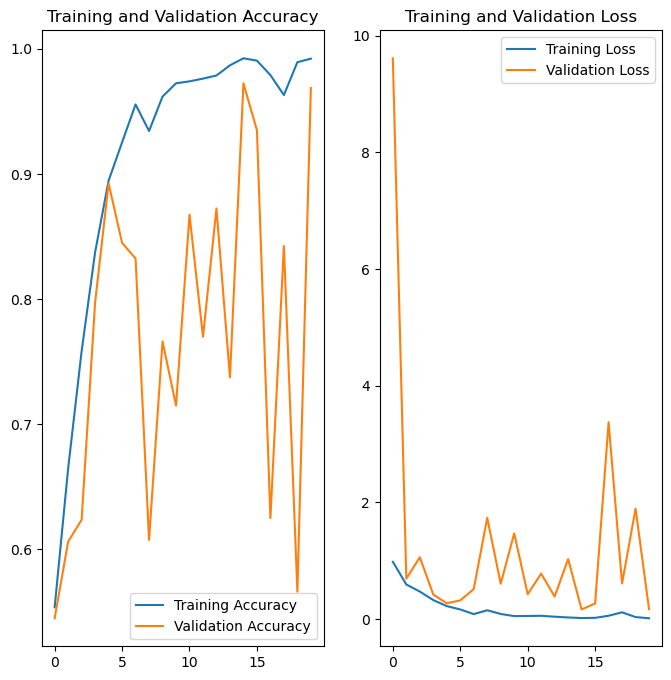

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Training radius 30

In [7]:
n_classes = 1
model_r30 = get_cnn_model(h=64,w=64,d=28)
checkpoint_filepath = r'A:\MSc\Pulmonary Nodules\models_checkpoints'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model_r30.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [8]:
epochs = 20
history = model_r30.fit(
  train_30,
  validation_data=val_30,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

model_r30.save(r'A:\MSc\Pulmonary Nodules\models\arranged_model_r30')

Epoch 1/30
200/200 [==============================] - ETA: 0s - loss: 0.8783 - accuracy: 0.5184

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 82s 363ms/step - loss: 0.8783 - accuracy: 0.5184 - val_loss: 3.8693 - val_accuracy: 0.4787
Epoch 2/30
200/200 [==============================] - ETA: 0s - loss: 0.6727 - accuracy: 0.5516

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 73s 366ms/step - loss: 0.6727 - accuracy: 0.5516 - val_loss: 0.6938 - val_accuracy: 0.5688
Epoch 3/30
200/200 [==============================] - 72s 359ms/step - loss: 0.5996 - accuracy: 0.6544 - val_loss: 2.1229 - val_accuracy: 0.4737
Epoch 4/30
200/200 [==============================] - ETA: 0s - loss: 0.4472 - accuracy: 0.7784

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 73s 367ms/step - loss: 0.4472 - accuracy: 0.7784 - val_loss: 0.7525 - val_accuracy: 0.6087
Epoch 5/30
200/200 [==============================] - 72s 360ms/step - loss: 0.3254 - accuracy: 0.8572 - val_loss: 1.5211 - val_accuracy: 0.5362
Epoch 6/30
200/200 [==============================] - ETA: 0s - loss: 0.2245 - accuracy: 0.9072

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 74s 369ms/step - loss: 0.2245 - accuracy: 0.9072 - val_loss: 0.2659 - val_accuracy: 0.8875
Epoch 7/30
200/200 [==============================] - 72s 361ms/step - loss: 0.1557 - accuracy: 0.9369 - val_loss: 1.0665 - val_accuracy: 0.6137
Epoch 8/30
200/200 [==============================] - 72s 362ms/step - loss: 0.1102 - accuracy: 0.9581 - val_loss: 0.8243 - val_accuracy: 0.6950
Epoch 9/30
200/200 [==============================] - 72s 361ms/step - loss: 0.1025 - accuracy: 0.9553 - val_loss: 0.6951 - val_accuracy: 0.8125
Epoch 10/30
200/200 [==============================] - 72s 362ms/step - loss: 0.0661 - accuracy: 0.9766 - val_loss: 2.3130 - val_accuracy: 0.5950
Epoch 11/30
200/200 [==============================] - 72s 362ms/step - loss: 0.0431 - accuracy: 0.9844 - val_loss: 0.5557 - val_accuracy: 0.8500
Epoch 12/30
200/200 [==============================] - 72s 362ms/step - loss: 0.0752 - accuracy: 0.9734 - val_loss: 3.0711 - val_accuracy: 

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 87s 436ms/step - loss: 0.0371 - accuracy: 0.9862 - val_loss: 0.1665 - val_accuracy: 0.9650
Epoch 14/30
200/200 [==============================] - 134s 672ms/step - loss: 0.0564 - accuracy: 0.9822 - val_loss: 0.9509 - val_accuracy: 0.7763
Epoch 15/30
200/200 [==============================] - 135s 673ms/step - loss: 0.0666 - accuracy: 0.9806 - val_loss: 0.8273 - val_accuracy: 0.7375
Epoch 16/30
200/200 [==============================] - ETA: 0s - loss: 0.0343 - accuracy: 0.9862  

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 13421s 67s/step - loss: 0.0343 - accuracy: 0.9862 - val_loss: 0.1220 - val_accuracy: 0.9675
Epoch 17/30
200/200 [==============================] - 73s 365ms/step - loss: 0.0252 - accuracy: 0.9900 - val_loss: 0.4636 - val_accuracy: 0.8325
Epoch 18/30
200/200 [==============================] - 73s 364ms/step - loss: 0.0199 - accuracy: 0.9944 - val_loss: 1.3279 - val_accuracy: 0.7188
Epoch 19/30
200/200 [==============================] - 72s 360ms/step - loss: 0.0254 - accuracy: 0.9925 - val_loss: 1.1228 - val_accuracy: 0.7575
Epoch 20/30
200/200 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9956

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 73s 367ms/step - loss: 0.0161 - accuracy: 0.9956 - val_loss: 0.1973 - val_accuracy: 0.9725
Epoch 21/30
200/200 [==============================] - 82s 412ms/step - loss: 0.0912 - accuracy: 0.9737 - val_loss: 3.9574 - val_accuracy: 0.5550
Epoch 22/30
200/200 [==============================] - 71s 358ms/step - loss: 0.0956 - accuracy: 0.9641 - val_loss: 0.1937 - val_accuracy: 0.9375
Epoch 23/30
200/200 [==============================] - 71s 358ms/step - loss: 0.0154 - accuracy: 0.9944 - val_loss: 0.1591 - val_accuracy: 0.9688
Epoch 24/30
  9/200 [>.............................] - ETA: 1:03 - loss: 0.0026 - accuracy: 1.0000

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential/batch_normalization/FusedBatchNormGradV3' defined at (most recent call last):
    File "C:\Users\peter\anaconda3\envs\tf\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\peter\anaconda3\envs\tf\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\peter\anaconda3\envs\tf\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\peter\anaconda3\envs\tf\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\peter\anaconda3\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\peter\AppData\Local\Temp\ipykernel_1160\3523236342.py", line 2, in <module>
      history = model_r30.fit(
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "C:\Users\peter\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential/batch_normalization/FusedBatchNormGradV3'
OOM when allocating tensor with shape[16,32,64,1792] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential/batch_normalization/FusedBatchNormGradV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1960]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Training radius 40

In [7]:
n_classes = 1
model_r40 = get_cnn_model(h=64,w=64,d=28)
checkpoint_filepath = r'A:\MSc\Pulmonary Nodules\models_checkpoints'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model_r40.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [8]:
epochs = 20
history = model_r40.fit(
  train_40,
  validation_data=val_40,
  epochs=epochs,
    callbacks=[model_checkpoint_callback]
)
model_r40.save(r'A:\MSc\Pulmonary Nodules\models\arranged_model_r40')

Epoch 1/20
200/200 [==============================] - ETA: 0s - loss: 1.0274 - accuracy: 0.5659

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 85s 368ms/step - loss: 1.0274 - accuracy: 0.5659 - val_loss: 3.7649 - val_accuracy: 0.4888
Epoch 2/20
200/200 [==============================] - ETA: 0s - loss: 0.5775 - accuracy: 0.6944

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 74s 371ms/step - loss: 0.5775 - accuracy: 0.6944 - val_loss: 0.6515 - val_accuracy: 0.5900
Epoch 3/20
200/200 [==============================] - ETA: 0s - loss: 0.4383 - accuracy: 0.7944

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 73s 367ms/step - loss: 0.4383 - accuracy: 0.7944 - val_loss: 0.6675 - val_accuracy: 0.6438
Epoch 4/20
200/200 [==============================] - ETA: 0s - loss: 0.3185 - accuracy: 0.8644

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 74s 369ms/step - loss: 0.3185 - accuracy: 0.8644 - val_loss: 0.6661 - val_accuracy: 0.7412
Epoch 5/20
200/200 [==============================] - ETA: 0s - loss: 0.2502 - accuracy: 0.8972

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 99s 497ms/step - loss: 0.2502 - accuracy: 0.8972 - val_loss: 0.3111 - val_accuracy: 0.8712
Epoch 6/20
200/200 [==============================] - 72s 361ms/step - loss: 0.1602 - accuracy: 0.9384 - val_loss: 0.3098 - val_accuracy: 0.8562
Epoch 7/20
200/200 [==============================] - 72s 361ms/step - loss: 0.1428 - accuracy: 0.9466 - val_loss: 2.0481 - val_accuracy: 0.6000
Epoch 8/20
200/200 [==============================] - 72s 361ms/step - loss: 0.1542 - accuracy: 0.9441 - val_loss: 0.5962 - val_accuracy: 0.7788
Epoch 9/20
200/200 [==============================] - 107s 534ms/step - loss: 0.1004 - accuracy: 0.9688 - val_loss: 0.6223 - val_accuracy: 0.7700
Epoch 10/20
200/200 [==============================] - ETA: 0s - loss: 0.0823 - accuracy: 0.9737

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 118s 590ms/step - loss: 0.0823 - accuracy: 0.9737 - val_loss: 0.2210 - val_accuracy: 0.9175
Epoch 11/20
200/200 [==============================] - ETA: 0s - loss: 0.0678 - accuracy: 0.9766

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 73s 366ms/step - loss: 0.0678 - accuracy: 0.9766 - val_loss: 0.1512 - val_accuracy: 0.9538
Epoch 12/20
200/200 [==============================] - 72s 359ms/step - loss: 0.0712 - accuracy: 0.9762 - val_loss: 0.8782 - val_accuracy: 0.7400
Epoch 13/20
200/200 [==============================] - 72s 360ms/step - loss: 0.0945 - accuracy: 0.9753 - val_loss: 0.9316 - val_accuracy: 0.7563
Epoch 14/20
200/200 [==============================] - 72s 361ms/step - loss: 0.0555 - accuracy: 0.9803 - val_loss: 0.1904 - val_accuracy: 0.9488
Epoch 15/20
200/200 [==============================] - 72s 360ms/step - loss: 0.0540 - accuracy: 0.9806 - val_loss: 6.2031 - val_accuracy: 0.5487
Epoch 16/20
200/200 [==============================] - ETA: 0s - loss: 0.0480 - accuracy: 0.9878 

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 10115s 51s/step - loss: 0.0480 - accuracy: 0.9878 - val_loss: 0.1197 - val_accuracy: 0.9688
Epoch 17/20
200/200 [==============================] - 71s 354ms/step - loss: 0.0383 - accuracy: 0.9856 - val_loss: 0.1402 - val_accuracy: 0.9625
Epoch 18/20
200/200 [==============================] - 73s 367ms/step - loss: 0.0589 - accuracy: 0.9778 - val_loss: 8.5377 - val_accuracy: 0.5025
Epoch 19/20
200/200 [==============================] - 73s 364ms/step - loss: 0.1443 - accuracy: 0.9547 - val_loss: 0.5943 - val_accuracy: 0.8313
Epoch 20/20
200/200 [==============================] - 72s 361ms/step - loss: 0.0431 - accuracy: 0.9834 - val_loss: 0.1228 - val_accuracy: 0.9600


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models\arranged_model_r30\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models\arranged_model_r30\assets


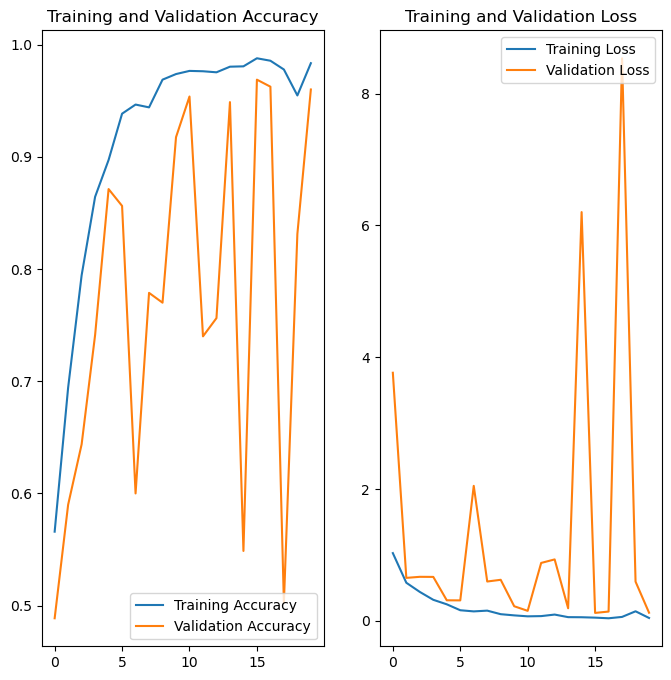

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Training radius 50

In [7]:
n_classes = 1
model_r50 = get_cnn_model(h=64,w=64,d=28)
checkpoint_filepath = r'A:\MSc\Pulmonary Nodules\models_checkpoints'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model_r50.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [9]:
epochs = 20
history = model_r50.fit(
  train_50,
  validation_data=val_50,
  epochs=epochs,
  callbacks = [model_checkpoint_callback]
)
model_r50.save(r'A:\MSc\Pulmonary Nodules\models\arranged_model_r50')

Epoch 1/20
200/200 [==============================] - ETA: 0s - loss: 0.9175 - accuracy: 0.5016

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models_checkpoints\assets


200/200 [==============================] - 84s 363ms/step - loss: 0.9175 - accuracy: 0.5016 - val_loss: 41.9602 - val_accuracy: 0.5275
Epoch 2/20
200/200 [==============================] - 70s 351ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 39.2939 - val_accuracy: 0.5275
Epoch 3/20
200/200 [==============================] - 70s 351ms/step - loss: 0.6931 - accuracy: 0.5069 - val_loss: 1.5759 - val_accuracy: 0.5238
Epoch 4/20
200/200 [==============================] - 70s 351ms/step - loss: 0.6931 - accuracy: 0.5069 - val_loss: 0.6938 - val_accuracy: 0.4725
Epoch 5/20
200/200 [==============================] - 70s 350ms/step - loss: 0.6931 - accuracy: 0.5069 - val_loss: 0.6938 - val_accuracy: 0.4725
Epoch 6/20
200/200 [==============================] - 70s 350ms/step - loss: 0.6931 - accuracy: 0.5069 - val_loss: 0.6939 - val_accuracy: 0.4725
Epoch 7/20
200/200 [==============================] - 70s 351ms/step - loss: 0.6931 - accuracy: 0.5069 - val_loss: 0.6939 - val_accuracy: 0

INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models\arranged_model_r50\assets


INFO:tensorflow:Assets written to: A:\MSc\Pulmonary Nodules\models\arranged_model_r50\assets


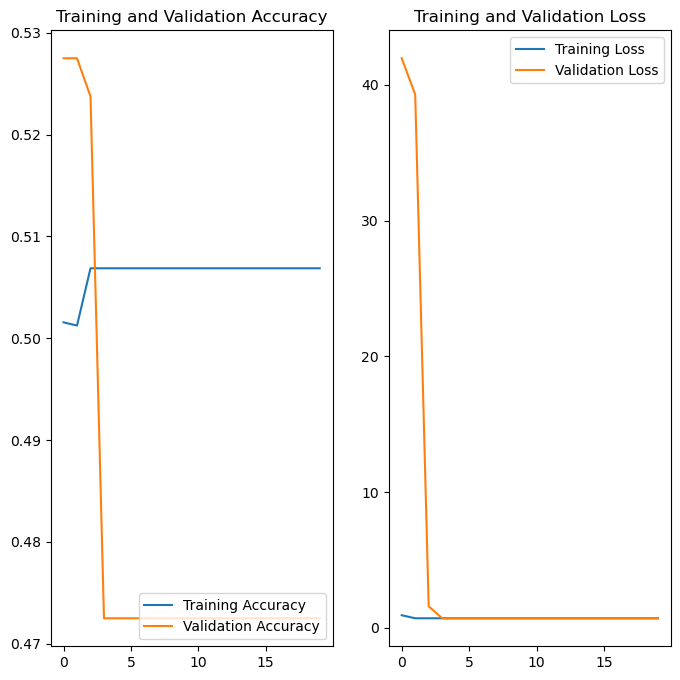

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Testing 

In [5]:
def get_binary_testing_data(radius, n1 = 2000, n2=2500, size = (64,64,28), levels=[1, 5]):
    h,w,d = size
    
    data = []
    label = []
    
    for level in levels:
        for i in tqdm(range(n1, n2)):
            try:
                data.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
            except :
                continue
            if level < 3:
                label.append(0)
            elif level > 3:
                label.append(1)
    return data, label

In [20]:
def test_data_prep(data, labels, BATCH_SIZE = 16):
    print('data length = ', len(labels))
    scaler = Normalizer(data)
    normalized = scaler.normalize(data)
    print("max of training dataset: ", np.max(normalized), " & min: ", np.min(normalized))
    data = tf.data.Dataset.from_tensor_slices((normalized, labels))
    test_data = data.batch(BATCH_SIZE)
    return normalized, labels, test_data

In [21]:
radii = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
test = []
y_test = []
for r in radii:
    t, l = get_binary_testing_data(radius = r, n1 = 2000, n2 = 2200)
    _, _, data = test_data_prep(t, l)
    test.append(data)
    #y_test.append(y)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

data length =  400
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

data length =  400
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

data length =  400
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

data length =  400
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

data length =  400
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

data length =  400
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

data length =  400
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

data length =  400
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

data length =  400
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

data length =  400
max of training dataset:  1.0  & min:  0.0


In [22]:
m10 = tf.keras.models.load_model(r'A:\MSc\Pulmonary Nodules\MY BEST MODELS\R10')
m20 = tf.keras.models.load_model(r'A:\MSc\Pulmonary Nodules\MY BEST MODELS\R20')
m30 = tf.keras.models.load_model(r'A:\MSc\Pulmonary Nodules\MY BEST MODELS\R30')
m40 = tf.keras.models.load_model(r'A:\MSc\Pulmonary Nodules\MY BEST MODELS\R40')
m50 = tf.keras.models.load_model(r'A:\MSc\Pulmonary Nodules\MY BEST MODELS\R50')
models = [m10, m20, m30, m40, m50]

In [14]:
preds = models[0].predict(x)
out = preds.copy()
out[preds<0.5] = 0
out[preds>-0.5] = 1
m = tf.keras.metrics.Accuracy()
m.update_state(out, y)
m.result().numpy()

13/13 [==============================] - 3s 207ms/step


0.5

In [23]:
results = {'m10': [], 'm20': [], 'm30': [], 'm40': [], 'm50': []}
for test_data in tqdm(test):
    for m in range(1, len(models) + 1):
        model_no = str(m * 10)
        model_name = 'm' + model_no
        r = models[m-1].evaluate(test_data)
        #preds = models[m-1].predict(test_data)
        #out = preds.copy()
        #out[preds<0.5] = 0
        #out[preds>= 0.5] = 1
        #m = tf.keras.metrics.Accuracy()
        #m.update_state(out, y)
        #m.result().numpy()
        results[model_name].append(r[1])

  0%|          | 0/10 [00:00<?, ?it/s]

25/25 [==============================] - 3s 110ms/step - loss: 0.6982 - accuracy: 0.5000


In [24]:
pd.DataFrame(results).to_csv(r'A:\MSc\Pulmonary Nodules\Results/m10-to-m50-arranged-results-2ksample.csv')

## Load Testing Data 10, 20, 40

In [13]:
n = 1000
n2 = 2000
h,w,d = 64, 64, 28

test_10 = []
test_label_10 = []

radius = 10
for level in [1, 5]:
    for i in tqdm(range(n, n2)):
        try:
            test_10.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
        except :
            continue
        if level < 3:
            test_label_10.append(0)
        else :
            test_label_10.append(1)

test_20 = []
test_label_20 = []
radius = 20
for level in [1, 5]:
    for i in tqdm(range(n, n2)):
        try:
            test_20.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
        except :
            continue
        if level < 3:
            test_label_20.append(0)
        else :
            test_label_20.append(1)
            
test_40 = []
test_label_40 = []
radius = 40
for level in [1, 5]:
    for i in tqdm(range(n, n2)):
        try:
            test_40.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
        except :
            continue
        if level < 3:
            test_label_40.append(0)
        else :
            test_label_40.append(1)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [14]:
def test_data_prep(data, labels, BATCH_SIZE = 32):
    scaler = Normalizer(data)
    normalized = scaler.normalize(data)
    print("max of training dataset: ", np.max(normalized), " & min: ", np.min(normalized))
    data = tf.data.Dataset.from_tensor_slices((normalized, labels))
    test_data = data.batch(BATCH_SIZE)
    return test_data

test_10 = test_data_prep(data_10, label_10)
test_20 = test_data_prep(data_20, label_20)
test_40 = test_data_prep(data_40, label_40)

max of training dataset:  1.0  & min:  0.0
max of training dataset:  1.0  & min:  0.0
max of training dataset:  1.0  & min:  0.0


## Results

### Model trained on radius 10 results

In [15]:
model_r10.evaluate(test_10)
model_r10.evaluate(test_20)
model_r10.evaluate(test_40)

NameError: name 'model_r10' is not defined

### Model trained on radius 20 results

In [26]:
model_r20.evaluate(test_10)
model_r20.evaluate(test_20)
model_r20.evaluate(test_40)

55/55 [==============================] - 9s 153ms/step - loss: 3.9234 - accuracy: 0.5247


[3.9234087467193604, 0.5246559381484985]

### Model trained on radius 40 results

In [32]:
model_r40.evaluate(test_10)
model_r40.evaluate(test_20)
model_r40.evaluate(test_40)

55/55 [==============================] - 9s 152ms/step - loss: 0.4920 - accuracy: 0.8257


[0.491988867521286, 0.8256880640983582]

In [16]:
model_rAll.evaluate(test_10)
model_rAll.evaluate(test_20)
model_rAll.evaluate(test_40)

55/55 [==============================] - 10s 166ms/step - loss: 1.2667 - accuracy: 0.5092


[1.2666913270950317, 0.5091742873191833]

## Loading malignant data only

In [17]:
mal_10 = []
mal_label_10 = []
radius = 10
level = 5
for i in tqdm(range(n, n2)):
    try:
        mal_10.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
    except :
        continue
    if level < 3:
        mal_label_10.append(0)
    else :
        mal_label_10.append(1)
        
mal_20 = []
mal_label_20 = []
radius = 20
level = 5
for i in tqdm(range(n, n2)):
    try:
        mal_20.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
    except :
        continue
    if level < 3:
        mal_label_20.append(0)
    else :
        mal_label_20.append(1)
        
mal_40 = []
mal_label_40 = []
radius = 40
level = 5
for i in tqdm(range(n, n2)):
    try:
        mal_40.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
    except :
        continue
    if level < 3:
        mal_label_40.append(0)
    else :
        mal_label_40.append(1)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [18]:
maltest_10 = test_data_prep(mal_10, mal_label_10)
maltest_20 = test_data_prep(mal_20, mal_label_20)
maltest_40 = test_data_prep(mal_40, mal_label_40)

max of training dataset:  1.0  & min:  0.0
max of training dataset:  1.0  & min:  0.0
max of training dataset:  1.0  & min:  0.0


In [20]:
model_rAll.evaluate(maltest_10)
model_rAll.evaluate(maltest_20)
model_rAll.evaluate(maltest_40)

8/8 [==============================] - 1s 143ms/step - loss: 2.3331 - accuracy: 0.2712


[2.3331305980682373, 0.2711864411830902]

# Results in Figures

In [65]:
model_r10 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r10')
model_r20 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r20')
model_r40 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r40')

In [50]:
def predict_for_roc(model, test):
    pred = model.predict(test).ravel()
    complement = 1 - pred
    return np.array([complement, pred]).T
roc_pred_r10 = predict_for_roc(model_r10, test_10)

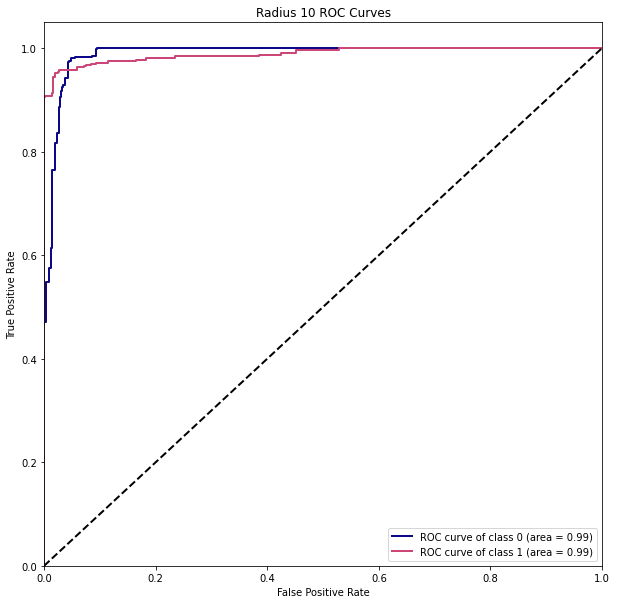

In [64]:
skplt.metrics.plot_roc(np.array(label_10), roc_pred_r10, 
                       title = "Radius 10 ROC Curves", 
                       plot_micro=False, plot_macro=False, 
                       figsize=(10,10), cmap='plasma')
plt.savefig('./figs/roc_r10.jpg')
plt.show()

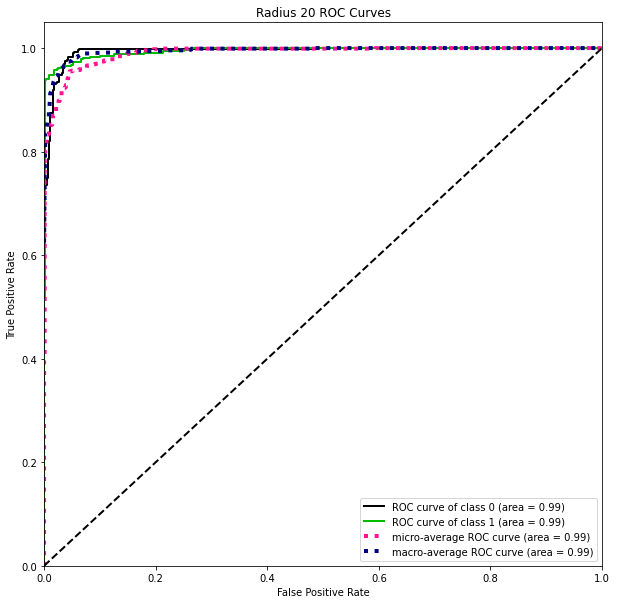

In [69]:
roc_pred_r20 = predict_for_roc(model_r20, test_20)
skplt.metrics.plot_roc(np.array(label_20), roc_pred_r20, 
                       title = "Radius 20 ROC Curves", 
                       plot_micro=True, plot_macro=True, 
                       figsize=(10,10))
plt.savefig('./figs/roc_r20_micromacro.jpg')
plt.show()

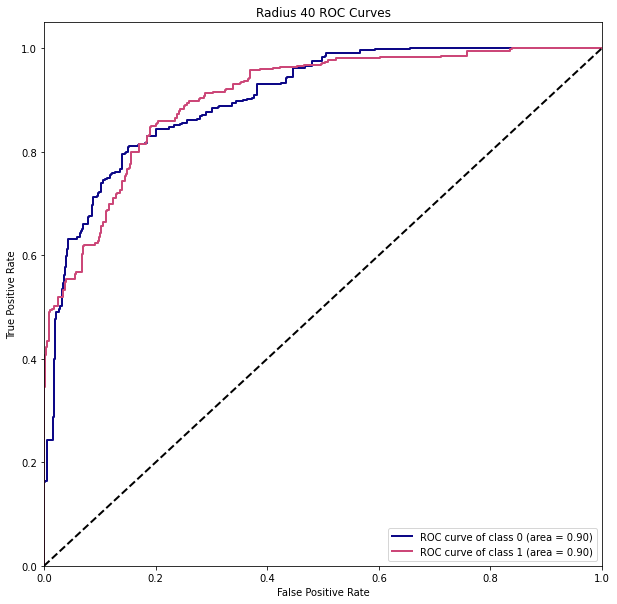

In [71]:
roc_pred_r40 = predict_for_roc(model_r40, test_40)
skplt.metrics.plot_roc(np.array(label_40), roc_pred_r40, 
                       title = "Radius 40 ROC Curves", 
                       plot_micro=False, plot_macro=False, 
                       figsize=(10,10), cmap='plasma')
plt.savefig('./figs/roc_r40.jpg')
plt.show()